In [1]:
# Copyright 2019 Institut für Nachrichtentechnik, RWTH Aachen University
%matplotlib notebook

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from IPython.display import clear_output, display, HTML

import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import scipy as sp
import scipy.special # erfc(x)

from ient_nb.ient_plots import *
eps = np.finfo(float).eps # very small positive number

<div>
    <img src="figures/rwth_ient_logo@2x.png" style="float: right;height: 5em;">
</div>

# Entropie Ternäre Quelle

Setze $p_1=p_2=p$ sowie $p_3 = 1-p_1-p_2 = 1-2p$.

Außerdem wird angenommen, dass das Nutzsignal $f(t)$ Gauß-verteilt ist mit Verteilungsdichtefunktion $p_f(x)$

In [2]:
x = np.arange(-12, 12, 0.01)
p = np.arange(0, 0.5, 0.001)

gaussian_pdf = lambda x, ms, sigmas: 1/(sigmas*np.sqrt(2*np.pi)) * np.exp(-(x-ms)**2/(2*sigmas**2))
gaussian_pf  = lambda x, ms, sigmas: 0.5*sp.special.erfc((ms-x)/np.sqrt(2*sigmas**2))
pf = lambda x: gaussian_pdf(x, 0, 5); Pf = lambda x: gaussian_pf(x, 0, 5); # shortcuts

Entropie der ternären Quelle 
$
    H(p) =
    2\left[-p\,\mathrm{lb}(p)\right] -
    (1-2p)\mathrm{lb}(1-2p)
$

In [3]:
H = lambda p: 2*(-p*np.log2(p+eps)) - (1-2*p)*np.log2(1-2*p+eps)

Plotte beispielhafte Verteilungsdichtefunktion $p_f(x)$ sowie resultierende Entropie $H(p)$

<IPython.core.display.Javascript object>


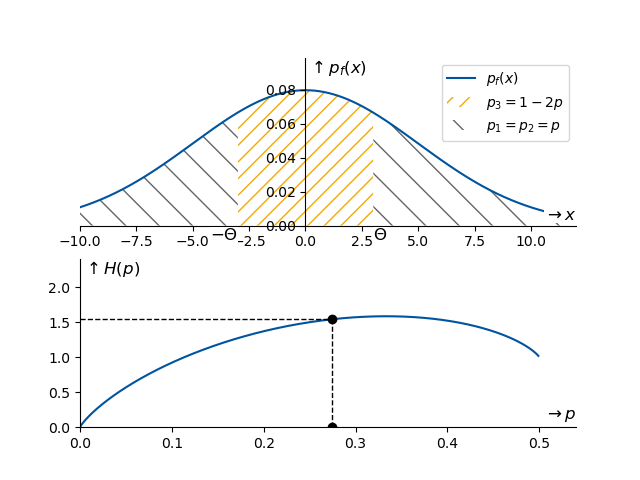

interactive(children=(FloatSlider(value=3.0, description='$\\Theta$', max=9.0, min=0.02, step=0.02), Output())…

In [4]:
fig, axs = plt.subplots(2, 1)
@interact(theta=widgets.FloatSlider(min=0.02, max=9, step=0.02, value=3, description='$\Theta$'))
def update_plot(theta):
    p_sel = Pf(-theta) # probability function gives p
    
    if not axs[0].lines: # plot everything for the first time
        ax = axs[0]; ax.plot(x, pf(x), 'rwth')
        ax.text(-theta, -0.001, r'$-\Theta$', fontsize=12, bbox=ient_wbbox, horizontalalignment='right', verticalalignment='top');
        ax.text( theta, -0.001, r'$ \Theta$', fontsize=12, bbox=ient_wbbox, horizontalalignment='left',  verticalalignment='top');
        ax.set_xlabel(r'$\rightarrow x$', bbox=ient_wbbox); ax.set_ylabel(r'$\uparrow p_f\left(x\right)$');
        ax.set_xlim(-10, 12); ax.set_ylim(0,0.099); ient_axis(ax);
        
        ax = axs[1]; ax.plot(p, H(p), 'rwth');
        ax.plot([p_sel, p_sel], [0, H(p_sel)], 'k--o', lw=1); ax.plot([0, p_sel], [H(p_sel), H(p_sel)], 'k--', lw=1);
        ax.set_xlabel(r'$\rightarrow p$'); ax.set_ylabel(r'$\uparrow H\left(p\right)$');
        ax.set_xlim(0,0.54);ax.set_ylim(0,2.4); ient_axis(ax);
    else: # remove patches and move texts
        [tmp.remove() for tmp in reversed(axs[0].collections)]
        axs[0].texts[0].set_x(-theta); axs[0].texts[1].set_x(theta);
        axs[1].lines[1].set_data(([p_sel, p_sel], [0, H(p_sel)])); 
        axs[1].lines[2].set_data(([0, p_sel], [H(p_sel), H(p_sel)]));  
        
    ax = axs[0]; # re-plot patches
    xtheta = x.copy(); xtheta[np.abs(xtheta) > theta] = np.nan;
    ax.fill_between(xtheta, 0, pf(xtheta), facecolor="none", hatch="//", edgecolor='orange', linewidth=0.0);
    xtheta = x.copy(); xtheta[xtheta < theta] = np.nan;
    ax.fill_between(xtheta, 0, pf(xtheta), facecolor="none", hatch="\\", edgecolor='black-75', linewidth=0.0);
    xtheta = x.copy(); xtheta[xtheta >- theta] = np.nan;
    ax.fill_between(xtheta, 0, pf(xtheta), facecolor="none", hatch="\\", edgecolor='black-75', linewidth=0.0);
    if not ax.get_legend_handles_labels()[0]: ax.legend([r'$p_f(x)$',r'$p_3=1-2p$',r'$p_1=p_2=p$']);
    print('p = {:.4f}, H(p) = {:.4f}'.format(p_sel, H(p_sel)))

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources) (OER). Feel free to use the notebook for your own purposes. The code is licensed under the [MIT license](https://opensource.org/licenses/MIT). 

Please attribute the work as follows: 
*Christian Rohlfing, Übungsbeispiele zur Vorlesung "Informationsübertragung"*, gehalten von Jens-Rainer Ohm, 2019, Institut für Nachrichtentechnik, RWTH Aachen University.